<a href="https://colab.research.google.com/github/heosooyoun/LLM/blob/main/chap4_3_GELU_%ED%99%9C%EC%84%B1%ED%99%94_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.3 GELU 활성화 함수를 사용하는 피드 포워드 네트워크 구현하기

- 피드포워드 네트워크: 두개의 선형층 사이에 하나의 활성함수(ReLU, GELU, SwiGLU 등 사용)

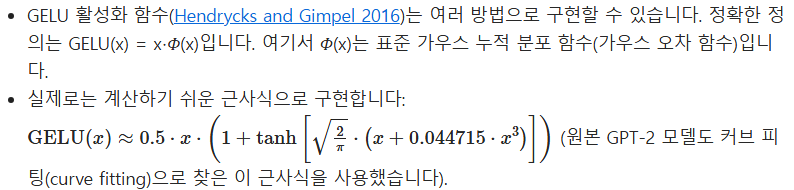

In [ ]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

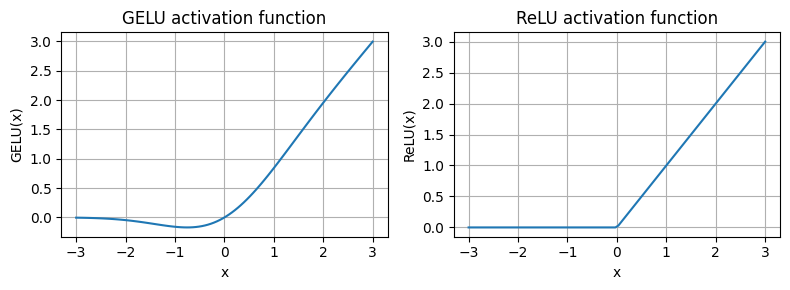

In [ ]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# 샘플 데이터
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

- GELU함수는 완만하며 모든 구간에서 미분 능
- ReLU함수는 원점에서 미분 불가능 -> 1로 대체해서 사용

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            # Sequential를 이용해 리니어 층 2개와 젤루 함수를 통과하함
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), # 출력은 임베딩 크기의 4배
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), # 출력을 다시 원본 임베딩 크기로
        ) #피드포워드네트워크에서 많은 모델 파라미터를 보유하고 있다

    def forward(self, x):
        return self.layers(x)

In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)

# 입력 크기: [batch_size, num_token, emb_size]
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])
